# Tensorflow Regression Example

In this iPython notebook I want to demonstrate a basic example of using Tensorflow to tackle a regression problem using a data set I will create using Python Numpy. TensorFlow is an open source software library released in 2015 by Google to make it easier for developers to design, build, and train deep learning models. TensorFlow originated as an internal library that Google developers used to build models in-house. <br> <br>At a high level, <b>TensorFlow is a Python library that allows users to express arbitrary computation as a graph of data flows.</b> Nodes in this graph represent mathematical operations, whereas edges represent data that is communicated from one node to another. Data in TensorFlow are represented as tensors, which are multidimensional arrays.

Firstly I want to import that packages I need for this notebook. These packages will be used for creation of the test data set and the preparation / presentation of the data.  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Now I will import the Tensorflow package.

In [3]:
import tensorflow as tf

We can use Numpy Linespace to create an evenly spaced set numbers over a specified interval. In this case we will create a list of 10,000 numbers. This will be the basis for the test data set. The result is a array (list) of evenly spaces numbers.

In [4]:
x_data = np.linspace(0.0,10.0,10000) 

In [5]:
x_data

array([  0.00000000e+00,   1.00010001e-03,   2.00020002e-03, ...,
         9.99799980e+00,   9.99899990e+00,   1.00000000e+01])

Now we need to create some random values (noise) to multiply the array of numbers against. This will make the data a bit more realistic. We need to make a value for each value in  the 10,000 so we feed in the Length of this as the number of random points to create.

In [6]:
noise = np.random.randn(len(x_data))

Now we need to create our line. The line will be modeled using the equation of Y = MX + B. Where B = 5 (the intercept). The model is trying to determine the value of M in this regression. We will apply a slope (angle) of the line of 0.5 and add the noise we created also.

In [7]:
y_true = (0.5 * x_data) + 5 + noise

Now we need to finish the data set by using pandas data frames. We will create two columns (representing the X & Y columns on a chart) and then use this for plotting. 

In [8]:
x_df = pd.DataFrame(data=x_data, columns=['X data'])

In [9]:
y_df = pd.DataFrame(data=y_true, columns=['Y data'])

In [10]:
my_data = pd.concat([x_df,y_df] ,axis=1)

Now we have created our data set we can examine the top rows.

In [11]:
my_data.head()

,X data,Y data
0,0.000,4.237204
1,0.001,4.687634
2,0.002,7.726954
3,0.003,5.169243
4,0.004,3.454306


We don't want to plot 10,000 points as that would be too much. Pandas has a nice feature that allows am sample to be extracted from a data set - lets get 500.

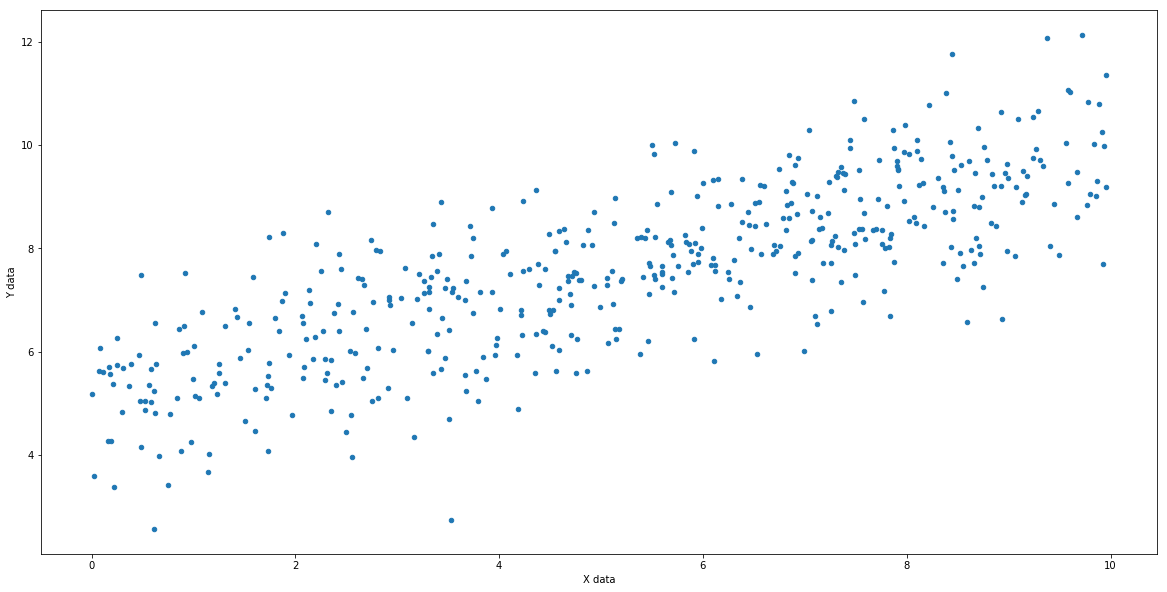

In [12]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
my_data.sample(500).plot(kind='Scatter', x='X data',y='Y data')

So the objective of Tensorflow is to try and fit a line that will show the slope of the data above. Since there are 10,000 points in the data set, we need to break it up into batches and run the regression training on smaller chunks of points.

So we will start by creating a batch variable that will control how many points we train on at a time.

In [13]:
batch_size =8 

So the idea of Tensorflow is that it will use a neural network (a collection of switches basically) to determine the best numbers that can be used as the slope and intercept of the regression line. So we need to star by setting the slope (M) and intercept (B) to a starting value. This has been chosen at random. Variables are for parameters of your model like weights. 

In [14]:
m = tf.Variable(0.99)
b = tf.Variable(0.5)

Next we need to create a Placeholder - Placeholders are for variables that you want to feed your model with. These placeholders need to be declared by anything starts and you must declare the data type expected, and how many values will be passing in (the batch size we set earlier). We need to create this both the X and Y 

In [15]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

So the next thing we have to do is define the graph (the actual operation that will be taking place in this). So we are trying to built a model that will be based on the idea that <br><br>Y = MX + B<br><br>So we need to create and object that will allow the placeholder values to be passed through it (xph) many times until Tensorflow has decided the best fit (or values) to pass in.

In [16]:
y_model = xph*m + b

Next we need a loss function. A loss function describes how far off the result your network produced is from the expected result - it indicates the magnitude of error your model made on its prediciton.<br>

You can then take that error and 'backpropagate' it through your model, adjusting its weights and making it get closer to the truth the next time around. Remember the YPH (Y Place holder is the true value) and we are subtracting this from the predicted value (Y_model) of the model we are running. So the smaller the result from this subtraction the better the prediction was.

In [17]:
error = tf.reduce_sum(tf.square(yph-y_model))

Next we need a Optimizer. This basically tunes the model to get the best model. It will use a <a href='https://en.wikipedia.org/wiki/Gradient_descent'>gradient descent optimizer</a> to tune the model. This loops though the possible combinations and arrives at the best fit for the model. The learning_rate is how large the steps between runs of the optimizer to be.

In [18]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

The last step is to prime the variables so they can be run. We use the Tensorflow Init function for this.

In [19]:
init = tf.global_variables_initializer()

Now we need to start the Tensorflow Session. We will then feed in the training data in batches and see how close the optimizer get the target slope (model_m) to the slope of  0.5 we set at the start. Also we will also be running the model for the b variable which was the intercept (5)

In [20]:
with tf.Session() as Sess:
    Sess.run(init)
    batches = 1000
    
    for i in range(batches):
        #create the batches using a random number
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        #using the random number from above grad the true value and the predicted value and put it into a feed dictionary.
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        #run the session and the train optimizer based on the feed
        Sess.run(train,feed_dict= feed)
        
    model_m, model_b = Sess.run([m,b])

We will check the slope output. We are expecting something close to 0.5

In [21]:
model_m

0.49670142

We will check the intercpet output. We are expecting something close to 5

In [22]:
model_b

4.9238839

This a good result considering we added a lot of noise to the data set. This can be drawn below below. First we calculate the slope (regression) line using the values with obtained from the model. Then we recreate the plot from the start and overlay the new slope line we have calculated.

In [23]:
y_hat = x_data* model_m + model_b

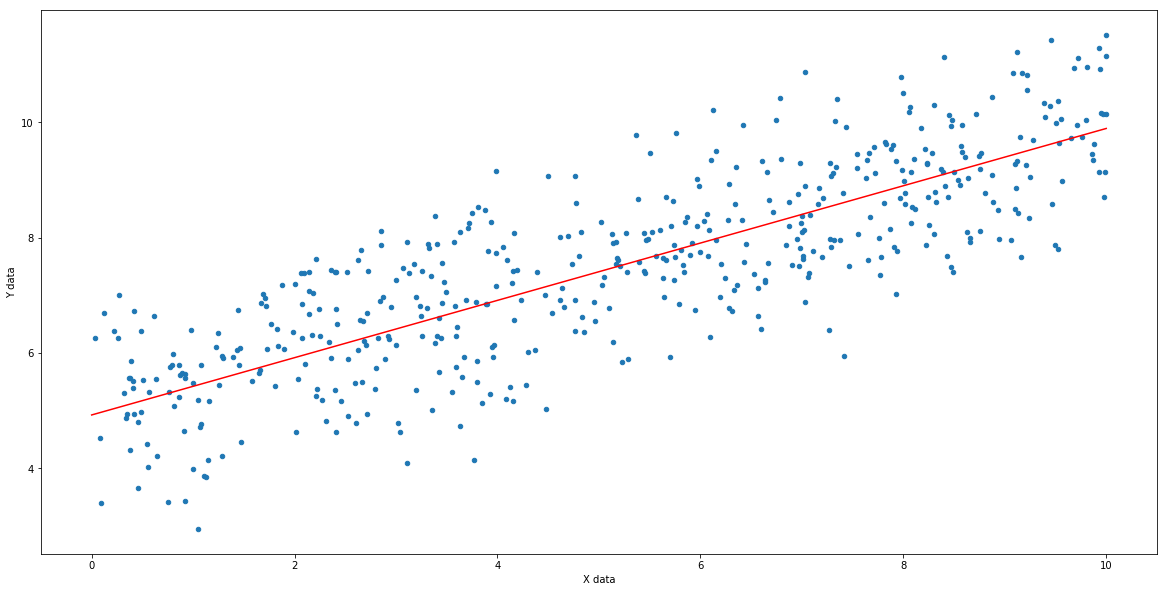

In [24]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
my_data.sample(500).plot(kind='Scatter', x='X data',y='Y data')
plt.plot(x_data, y_hat,'r')

So we can see above that we used Tesnsorflow to create a slope / intercept line across the subset of the data set. 
<br>